import libraries

In [1]:
import pandas as pd
import numpy as np

read the dataset

In [2]:
df=pd.read_csv('/content/employees.csv')
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


getting insights about the dataset

In [3]:
df.shape

(1000, 8)

In [5]:
#Let’s get a quick summary of the dataset using the pandas describe() method. The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [6]:
#Now, let’s also see the columns and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


changing dtype from object to date time

In [7]:
#Start Date is an important column for employees. However, it is not of much use if we can not handle it properly to handle this type of data pandas provide a special function datetime() from which we can change object type to DateTime format.
df['Start Date']= pd.to_datetime(df['Start Date'])

In [8]:
# We can see the number of unique elements in our dataset. This will help us in deciding which type of encoding to choose for converting categorical columns into numerical columns.
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

Handling missing values

In [9]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

We can see that every column has a different amount of missing values. Like Gender has 145 missing values and salary has 0. Now for handling these missing values there can be several cases like dropping the rows containing NaN or replacing NaN with either mean, median, mode, or some other value.

In [10]:
# let’s try to fill in the missing values of gender with the string “No Gender”.
df["Gender"].fillna("No Gender", inplace = True)
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

We can see that now there is no null value for the gender column. Now, Let’s fill the senior management with the mode value.

In [11]:
df = df.dropna(axis = 0, how = 'any')
print(df.isnull().sum())
df.shape

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(899, 8)

Data encoding

In [12]:
#. we can use different methods for encoding like Label encoding or One-hot encoding. pandas and sklearn provide different functions for encoding in our case we will use the LabelEncoding function from sklearn to encode the Gender column.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']=le.fit_transform\
                 (df['Gender'])

<ipython-input-12-f6564202207c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=le.fit_transform\


Data visualization
Historgram can be used for both uni and bivariate analysis

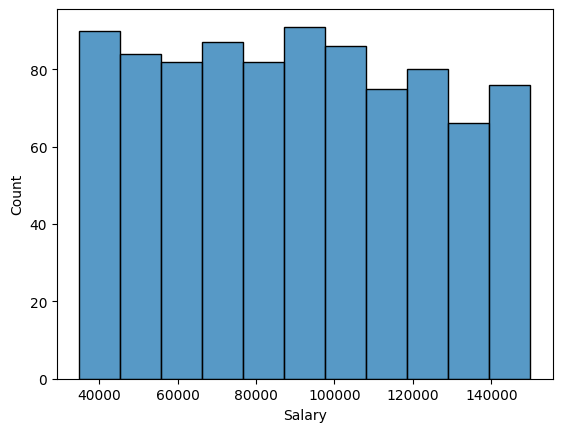

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Salary', data=df,)
plt.show()


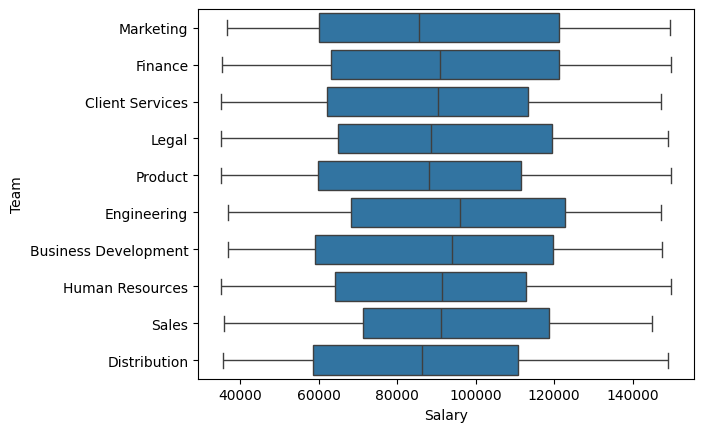

In [14]:
#boxplot can also be used for univariate and bivariate analysis
sns.boxplot(x="Salary", y='Team', data=df,)
plt.show()

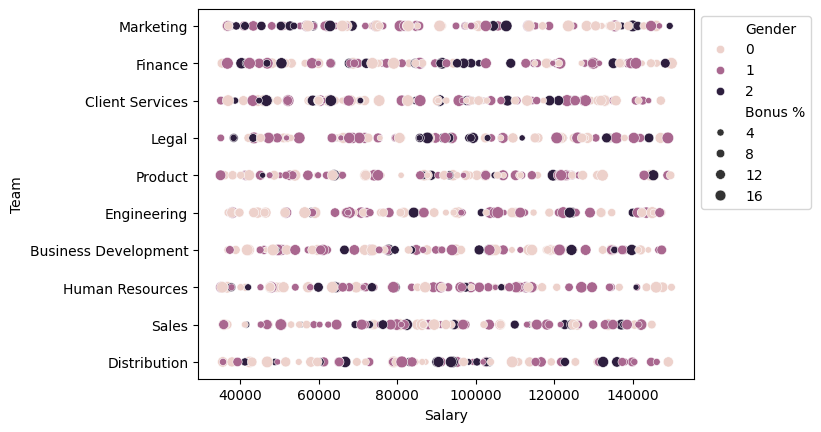

In [15]:
#using scatter boxplot for bivariate analysis
sns.scatterplot(x="Salary", y='Team', data=df,
                hue='Gender', size='Bonus %')
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()

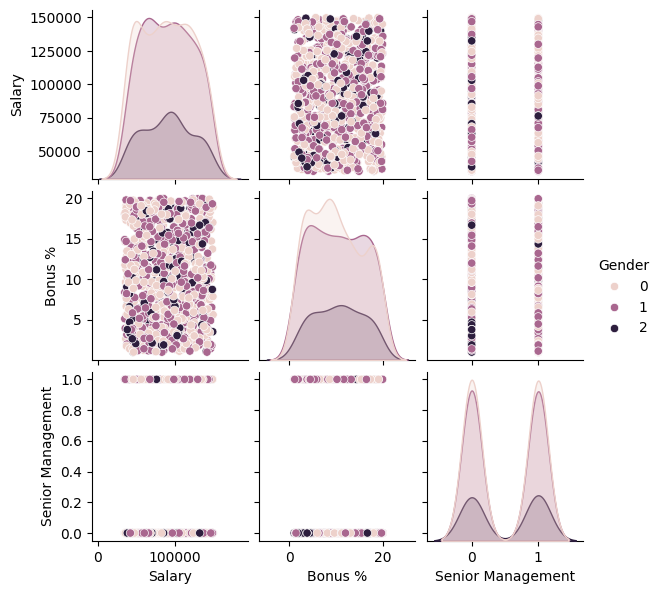

In [16]:
#in multivariate analysis we can use pairplot(method of the seaborn module)
sns.pairplot(df,hue='Gender', height=2)